In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


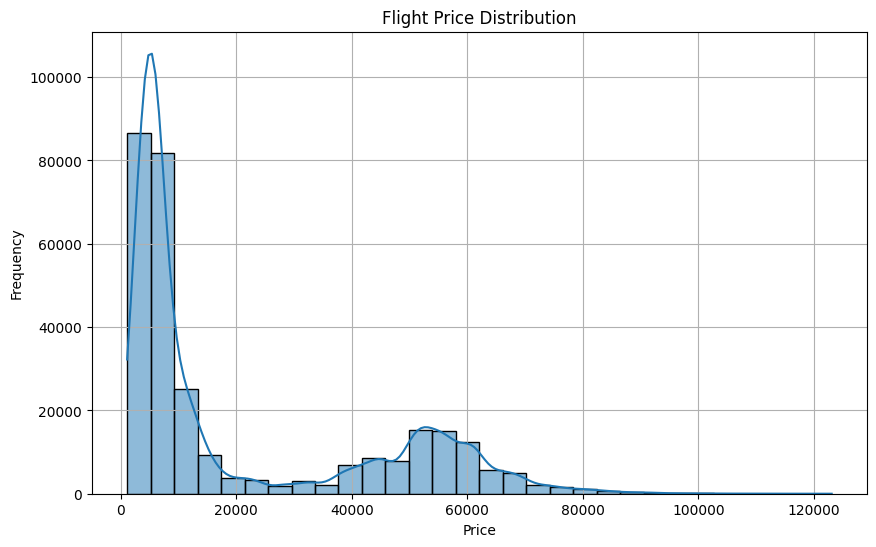

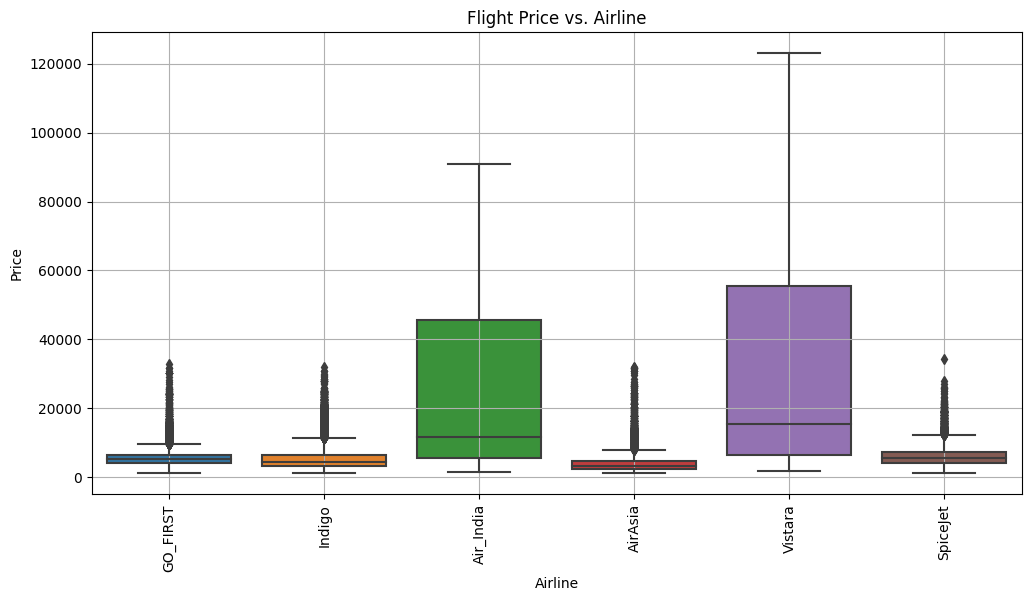

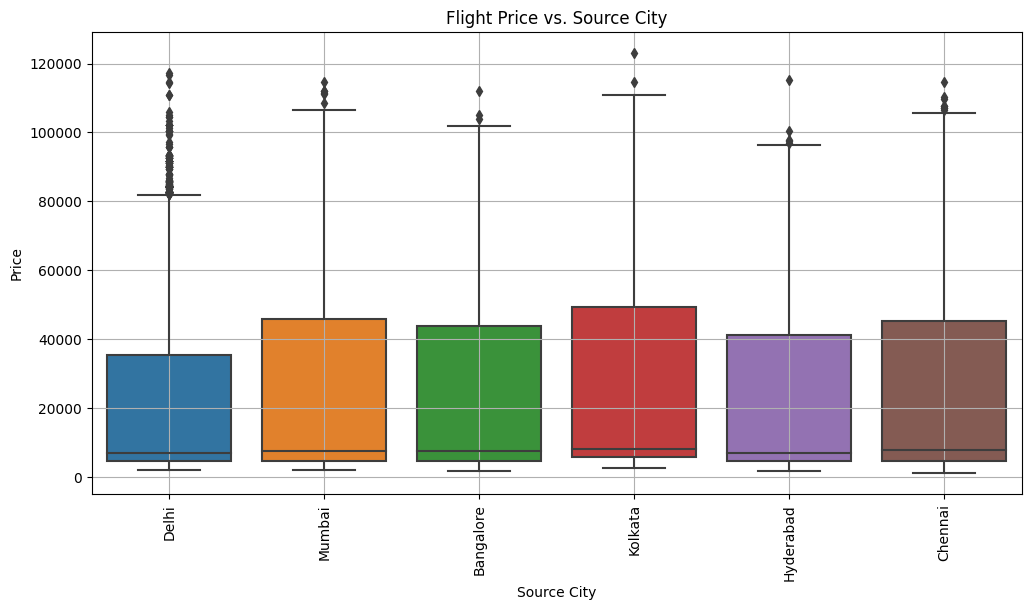

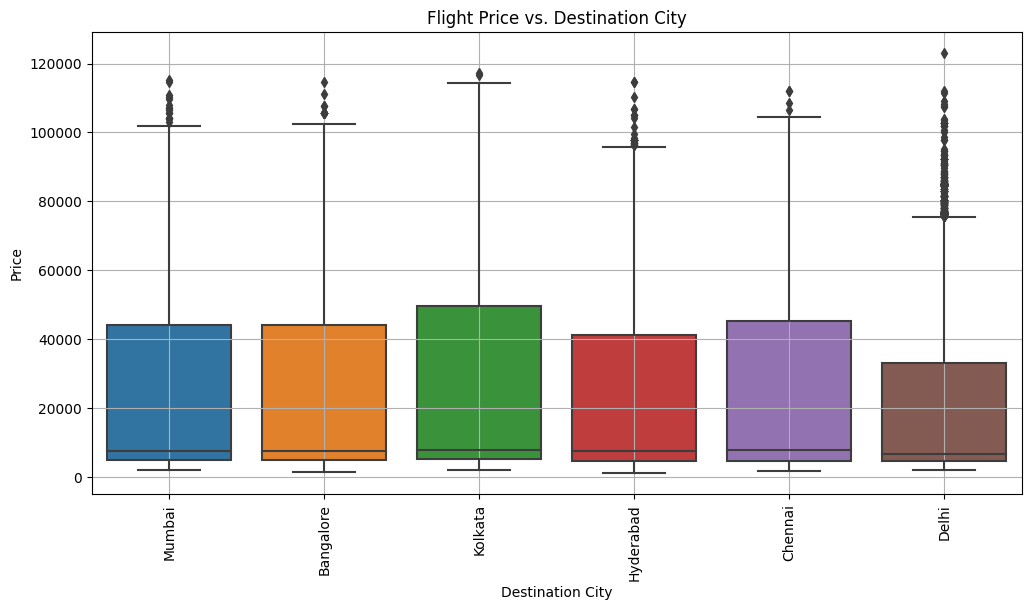

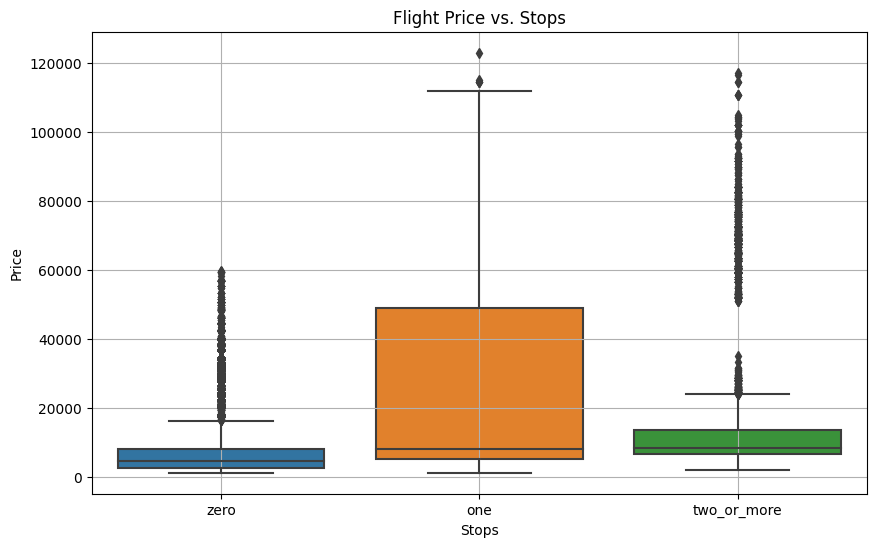

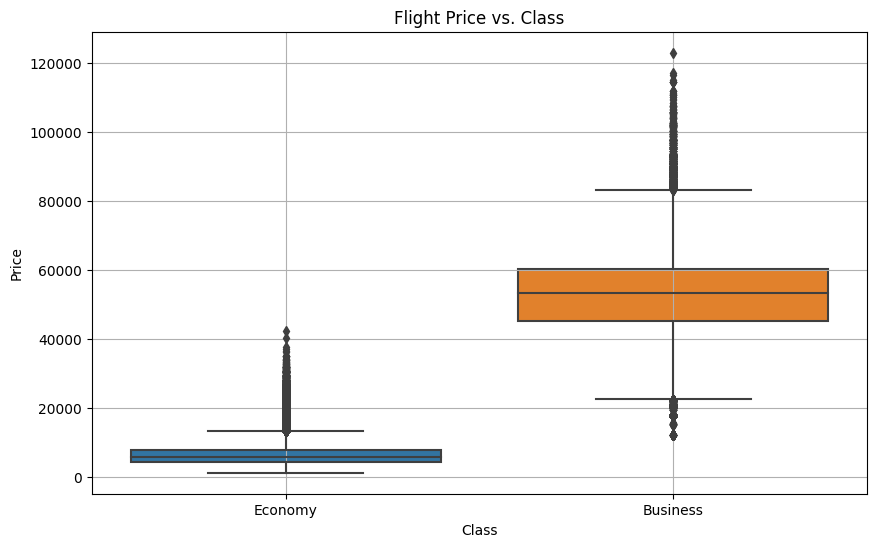

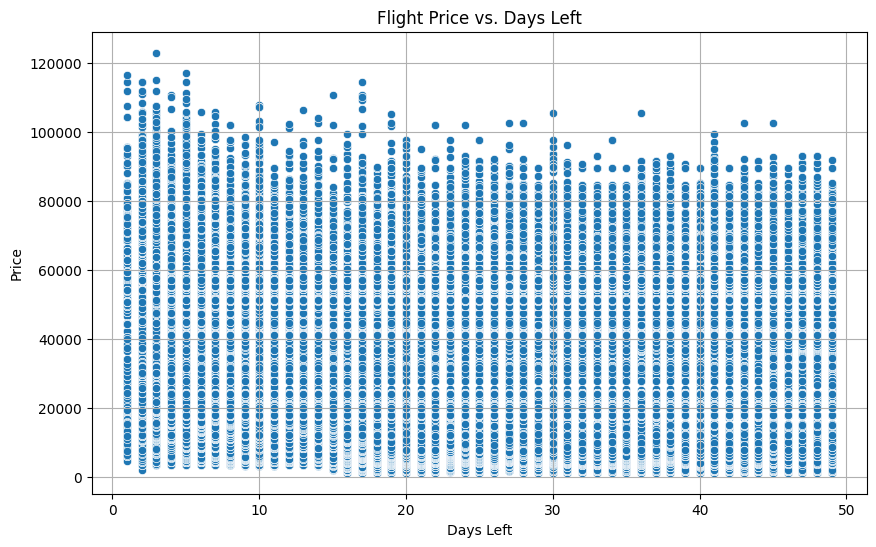

Predicted Price (Random Forest Regression): $2867.30


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset (replace 'data.csv' with your dataset)
data = pd.read_csv('/content/drive/MyDrive/fpa1_data.csv')

# Convert the 'price' column to numeric, handling any non-numeric values
data['price'] = pd.to_numeric(data['price'], errors='coerce')

# Filter out rows with missing 'price' values (if any)
data = data.dropna(subset=['price'])

# Explore the dataset with some visualizations
# Visualize the distribution of flight prices
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Flight Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Visualize the relationship between 'Airline' and 'Price'
plt.figure(figsize=(12, 6))
sns.boxplot(x='airline', y='price', data=data)
plt.title('Flight Price vs. Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Visualize the relationship between 'Source City' and 'Price'
plt.figure(figsize=(12, 6))
sns.boxplot(x='source_city', y='price', data=data)
plt.title('Flight Price vs. Source City')
plt.xlabel('Source City')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Visualize the relationship between 'Destination City' and 'Price'
plt.figure(figsize=(12, 6))
sns.boxplot(x='destination_city', y='price', data=data)
plt.title('Flight Price vs. Destination City')
plt.xlabel('Destination City')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Visualize the relationship between 'Stops' and 'Price'
plt.figure(figsize=(10, 6))
sns.boxplot(x='stops', y='price', data=data)
plt.title('Flight Price vs. Stops')
plt.xlabel('Stops')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# Visualize the relationship between 'Class' and 'Price'
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='price', data=data)
plt.title('Flight Price vs. Class')
plt.xlabel('Class')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# Visualize the relationship between 'Days Left' and 'Price'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='days_left', y='price', data=data)
plt.title('Flight Price vs. Days Left')
plt.xlabel('Days Left')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# Split the data into features (X) and target variable (y)
X = pd.get_dummies(data[['airline', 'source_city', 'stops', 'destination_city', 'class', 'days_left']], drop_first=True)
y = data['price']

# Create a Random Forest Regression model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest Regression model
model_rf.fit(X, y)

# Now, you can use the Random Forest Regression model for making predictions

# Input data for prediction (replace with your specific values)
input_data = pd.DataFrame({
    'airline_Air_India': [0],  # Replace with the correct value (0 or 1)
    'airline_GO_FIRST': [0],  # Replace with the correct value (0 or 1)
    'airline_Indigo': [1],    # Replace with the correct value (0 or 1)
    'airline_SpiceJet': [0],  # Replace with the correct value (0 or 1)
    'airline_Vistara': [0],   # Replace with the correct value (0 or 1)
    'source_city_Mumbai': [0], # Replace with the correct value (0 or 1)
     'source_city_Kolkata': [0],
     'source_city_Hyderabad': [0],
     'source_city_Chennai': [1],
     'source_city_Delhi': [0],
    'stops_zero': [1],
    'stops_two_or_more': [0],
    'destination_city_Mumbai': [0], # Replace with the correct value (0 or 1)
    'destination_city_Kolkata': [0], # Replace with the correct value (0 or 1)
    'destination_city_Hyderabad': [0], # Replace with the correct value (0 or 1)
    'destination_city_Chennai': [0], # Replace with the correct value (0 or 1)
    'destination_city_Delhi': [1], # Replace with the correct value (0 or 1)
    'class_Economy': [1],    # Replace with the correct value (0 or 1)
    'days_left': [40]
})

# Reorder columns in input_data to match the order of columns in the training data
input_data = input_data[[
    'days_left', 'airline_Air_India', 'airline_GO_FIRST', 'airline_Indigo',
    'airline_SpiceJet', 'airline_Vistara', 'source_city_Chennai',
    'source_city_Delhi', 'source_city_Hyderabad', 'source_city_Kolkata',
    'source_city_Mumbai', 'stops_two_or_more', 'stops_zero',
    'destination_city_Chennai', 'destination_city_Delhi',
    'destination_city_Hyderabad', 'destination_city_Kolkata',
    'destination_city_Mumbai', 'class_Economy'
]]

# Use the Random Forest Regression model to make predictions
predicted_price_rf = model_rf.predict(input_data)

print(f'Predicted Price (Random Forest Regression): ${predicted_price_rf[0]:.2f}')
